In [1]:
# 数据加载及预处理
import torch
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() #将Tensor转化为image，方便可视化

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))
])
# 训练集
train_set = tv.datasets.CIFAR10(
    root = 'R:\coding\CIFAR_10_cls',
    train = True,
    download=False,
    transform = transform
)
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size = 4,
    shuffle = True,
    num_workers = 2
)

# 测试集
test_set = tv.datasets.CIFAR10(
    root = 'R:\coding\CIFAR_10_cls',
    train = True,
    download=False,
    transform = transform
)

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size = 4,
    shuffle = False,
    num_workers = 2
)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


1 car


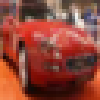

In [5]:
# dataset对象是一个数据集，可以按照下标进行访问，返回数据。
(data, label) = train_set[5]
print(label, classes[label])
show = ToPILImage() #将Tensor转化为image，方便可视化
show((data+1) / 2).resize((100, 100))

       frog       truck       truck        deer


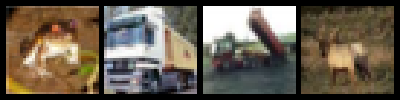

In [11]:
# dataloader是一个可迭代对象，
# 将dataset返回的每一条数据样本拼接成一个batch，并提供多线程加速优化和数据打乱等操作。
# 当程序对dataset的所有数据层遍历完成一遍之后，对dataloader也就完成了一次迭代。
data_iter = iter(train_loader)
images, labels = data_iter.next() # 返回四张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

In [8]:
# 定义NN
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv_1 = nn.Conv2d(3, 6, 5)
        self.conv_2 = nn.Conv2d(6, 16, 5)
        self.fc_1 = nn.Linear(16*5*5, 120)
        self.fc_2 = nn.Linear(120, 84)
        self.fc_3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv_1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv_2(x)), 2)
        x = x.view(x.size()[0], -1) # reshape, -1表示自适应
        x = F.relu(self.fc_1(x))
        x = F.relu(self.fc_2(x))
        x = self.fc_3(x)
        return x
net = Net()
print(net)

# 定义损失函数与优化器
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Net(
  (conv_1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv_2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc_1): Linear(in_features=400, out_features=120, bias=True)
  (fc_2): Linear(in_features=120, out_features=84, bias=True)
  (fc_3): Linear(in_features=84, out_features=10, bias=True)
)


In [13]:
from torch.autograd import Variable
# 训练网络
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):  # 0：从索引0开始
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()  # 后续，每2000打印一次，取这2000的平均
        if i % 2000 == 1999:
            print('[%d, %5d] loss= %.3f' % (epoch+1, i+1, running_loss/2000))
            running_loss = 0
print('done!!')

[1,  2000] loss= 2.213
[1,  4000] loss= 1.885
[1,  6000] loss= 1.706
[1,  8000] loss= 1.598
[1, 10000] loss= 1.563
[1, 12000] loss= 1.491
[2,  2000] loss= 1.429
[2,  4000] loss= 1.403
[2,  6000] loss= 1.338
[2,  8000] loss= 1.301
[2, 10000] loss= 1.310
[2, 12000] loss= 1.270
done!!
